In [42]:
pwd

'C:\\Users\\91914\\Documents\\Imarticsu Learning\\IMARTICUS LEARNING STUDY MATERIALS\\5. Machine Learning\\machine learning hyper parameter for all the model'

## Performing the hyperparameter for all the model

### Importing the libraries

loading the dataset online

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
df=load_breast_cancer()
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [46]:
X=pd.DataFrame(df.data,columns=df.feature_names)
y=pd.DataFrame(df.target,columns=['Cancer'])
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [47]:
X.shape

(569, 30)

In [48]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## Standard Scaler

Will bring all the data in same scale using StandardScaler

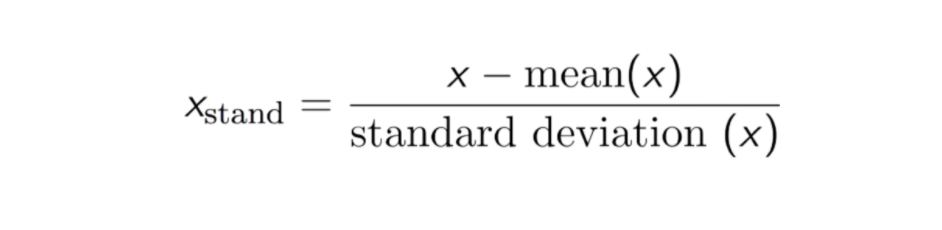

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
scaled_df=pd.DataFrame(scaled,columns=X.columns)

In [8]:
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
scaled_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [16]:
mean = scaled_df['mean radius'].mean()
std = scaled_df['mean radius'].std()
print(f'Mean = {mean}, Std = {std}')

Mean = -3.1628673513486446e-15, Std = 1.0008798945829014


### It will transform your data where mena = 0 and std = 1

### Now will do manual 

In [20]:
mean_mr = X['mean radius'].mean()
std_mr = X['mean radius'].std()

In [25]:
for i in X['mean radius']:
    a = round((i - mean_mr)/std_mr,6)
    print(a)

1.0961
1.828212
1.578499
-0.768233
1.748758
-0.475956
1.169878
-0.118413
-0.319885
-0.473118
0.537083
0.46898
1.430942
0.488843
-0.112737
0.117112
0.156839
0.568298
1.612551
-0.166653
-0.297184
-1.311926
0.344124
1.995633
0.715855
0.8549
0.128463
1.272034
0.332773
0.976918
1.277709
-0.649052
0.820848
1.459318
0.568298
0.741394
0.03482
-0.311372
0.244806
-0.183678
-0.195029
-0.901603
1.402565
-0.240431
-0.271645
1.283384
-1.68309
-0.271645
-0.589462
-0.180841
-0.671753
-0.138276
-0.620676
1.161365
0.27602
-0.739857
1.442292
0.165352
-0.305697
-1.563341
-1.122939
-1.569017
0.03482
-1.405852
-0.41069
0.185215
-1.322993
-0.799447
-1.446714
-0.382314
1.365676
-1.486725
0.871926
-0.092874
-0.515683
0.551272
-0.16949
1.113125
1.717544
-0.359612
-0.75972
-0.223405
3.147717
1.411078
-0.60365
1.229469
0.100086
1.388377
-0.501495
0.145488
0.139813
0.352637
-0.243269
-0.192191
0.26467
1.740245
-0.552572
-1.231621
-0.717156
0.08306
-0.146789
-2.027864
-0.552572
-1.206366
-1.032134
-0.288671
-0.7058

### You can see both SKLearn and Manual is giving same results

## Min Max Scaller

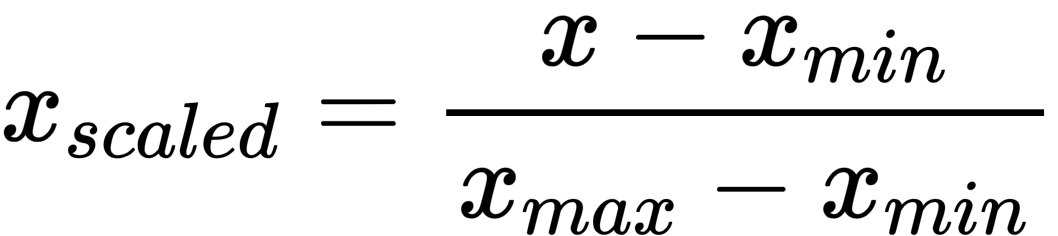

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(X)

# Converting to ndarray to Dataframe
scaled_df=pd.DataFrame(scaled_data,columns = X.columns)

# Print 
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [38]:
min_radius = min(scaled_df['mean radius'])
max_radius = max(scaled_df['mean radius'])
print(f'Min = {min_radius}, Max = {max_radius}')

Min = 0.0, Max = 1.0


### It will transform your data between 0 to 1

### Now will do manual 

In [39]:
min_br = min(X['mean radius'])
max_br = max(X['mean radius'])

In [40]:
for i in X['mean radius']:
    a = round((i - min_br)/(max_br - min_br),6)
    print(a)

0.521037
0.643144
0.601496
0.21009
0.629893
0.258839
0.533343
0.318472
0.284869
0.259312
0.427801
0.416442
0.576885
0.419755
0.319419
0.357755
0.364381
0.433007
0.607175
0.310426
0.288655
0.119409
0.395617
0.671068
0.457617
0.480808
0.359648
0.550381
0.393724
0.50116
0.551328
0.229968
0.475129
0.581618
0.433007
0.461877
0.34403
0.286289
0.379052
0.307587
0.305694
0.187846
0.572152
0.298121
0.292915
0.552274
0.057504
0.292915
0.239907
0.30806
0.226182
0.315159
0.234701
0.531923
0.384259
0.214823
0.578778
0.365801
0.287236
0.077476
0.15093
0.07653
0.34403
0.103744
0.269724
0.369114
0.117564
0.204884
0.096928
0.274457
0.565999
0.090255
0.483648
0.322732
0.252213
0.430167
0.309953
0.523877
0.624686
0.278243
0.21151
0.300961
0.863221
0.573572
0.237541
0.543282
0.354915
0.569786
0.254579
0.362488
0.361541
0.397037
0.297648
0.306167
0.382365
0.628473
0.24606
0.132803
0.218609
0.352075
0.313739
0.0
0.24606
0.137015
0.166075
0.290075
0.220503
0.254579
0.723603
0.206304
0.13233
0.267358
0.344503

### You can see both SKLearn and Manual is giving same results

## Now will perfrom the svm model and check the accuracy

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [19]:
from sklearn.svm import SVC

model1=SVC()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Will check the performance of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

confusion_matrix(y_test,y_pred)

array([[ 52,  11],
       [  0, 108]])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [24]:
# will still more imporove our model using hyper parameter tuning
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV

# defining Parameter Range
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.887 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.899 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.924 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.646 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.1s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.646 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.1s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.1s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.911 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=1000, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.646 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.899 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.924 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
# print best parameter after tuning

print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [26]:
y_test_pred=grid.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



### Most important hyperparameters of Random Forest:

1. n_estimators = This hyperparameter tells us about howmany number of trees is considered to build a model if you keep on Increasing accuracy of training & testing increases but at perticular point it remains constant (no of trees)
2. max_features = Maximum number of features considered for splitting a node, By default it is better to consider to take square root of the number of features in the dataset, By Increasing the featutes both training & testing accuracy increases but at some point testing accuracy decreases but training accuracy keep on increasing (which leads to overfitting)
3. max_depth = The longest path beteen the root node and the leaf node, If you increase the number of depth both training & testing accuracy increases but after some depth the test accuracy will decrease but training accuracy will keep on increasing (which leads to overfitting)
4. criterion = It is the measure used to evaluate the quality of a split when building decision trees within the forest, such as "gini" or "entropy".
5. min_samples_split = The minimum required number of observation(data points) in any given node before the node is split, By increasing the number of min_samples_split the accuracy in training model decreases grastically but the accuracy in the testing data increase but after some time both the accuracy will get decreased
6. min_samples_leaf = The minimum number of samples that should be present in the leaf node after spliting nodes By increasing the number of min_samples_leaf the accuracy in training model decreases grastically but the accuracy in the testing data increase but after some time both the accuracy will get decreased  (if we don't have min_samples_leaf, its parent node is considered as a leaf node)
7. bootstrap = method for sampling data points (with or without replacement)

In [27]:
# Now will perform RandomForest Classifier

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [29]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [34]:
model3=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',n_estimators=500)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [35]:
confusion_matrix(y_test,y_pred)

array([[ 59,   4],
       [  1, 107]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

